In [1]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# features and labels
X = torch.arange(3.0, 2000.0, 2).unsqueeze(dim=1)
y = torch.arange(7.0, 4001.0, 4).unsqueeze(dim=1)

In [3]:
X[:10]

tensor([[ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.],
        [13.],
        [15.],
        [17.],
        [19.],
        [21.]])

In [4]:
y[:10]

tensor([[ 7.],
        [11.],
        [15.],
        [19.],
        [23.],
        [27.],
        [31.],
        [35.],
        [39.],
        [43.]])

In [5]:
X.size(), y.size()

(torch.Size([999, 1]), torch.Size([999, 1]))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [7]:
X_train[:10]

tensor([[1559.],
        [ 575.],
        [ 333.],
        [1923.],
        [ 989.],
        [1973.],
        [ 133.],
        [ 285.],
        [ 491.],
        [1655.]])

In [8]:
def plot_predictions(train_data=X_train.cpu(), 
                     train_labels=y_train.cpu(), 
                     test_data=X_test.cpu(), 
                     test_labels=y_test.cpu(), 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

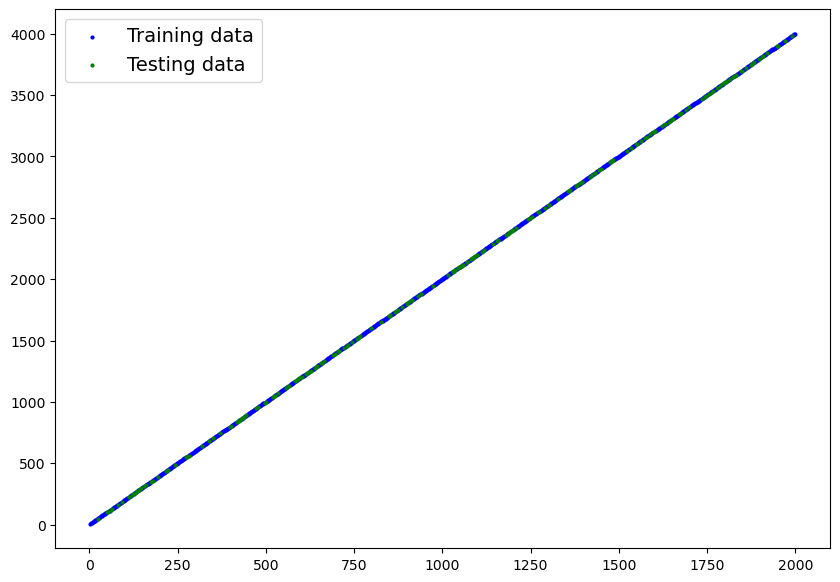

In [9]:
plot_predictions()

In [10]:
X_train.size(), X_test.size(), y_train.size(), y_test.size()

(torch.Size([799, 1]),
 torch.Size([200, 1]),
 torch.Size([799, 1]),
 torch.Size([200, 1]))

In [11]:
# Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(
            in_features=1,
            out_features=1
        )


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


torch.manual_seed(42)

model = LinearRegressionModel()
model, model.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [12]:
# Check model device
next(model.parameters()).device

device(type='cpu')

In [13]:
next(model.parameters())

Parameter containing:
tensor([[0.7645]], requires_grad=True)

In [14]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.00001
)

In [15]:
# Use Apple GPU if available, else CPU. No real need of CUDA or MPS for this toy problem

if torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

In [16]:
device

device(type='mps')

In [17]:
# Training the model
torch.manual_seed(42)

# Epoch count
epochs = 1000

# Move data and model to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

model.to(device)

for epoch in range(epochs):
    model.train()

    # 1.Forward pass
    y_pred = model(X_train)

    # 2.Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3.Zero grad optimizer
    optimizer.zero_grad()

    # 4.Loss backward
    loss.backward()

    # 5.Step up the optimizer
    optimizer.step()


    # Testing
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)


    if epoch % 100 == 0:
        print(f'Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}')

Epoch: 0 | Train loss: 1230.75927734375 | Test loss: 1251.0999755859375
Epoch: 100 | Train loss: 238.6316375732422 | Test loss: 234.37625122070312
Epoch: 200 | Train loss: 0.44015204906463623 | Test loss: 9.72045612335205
Epoch: 300 | Train loss: 0.33327701687812805 | Test loss: 9.82997989654541
Epoch: 400 | Train loss: 0.22641228139400482 | Test loss: 9.939496040344238
Epoch: 500 | Train loss: 0.1385427564382553 | Test loss: 10.029541015625
Epoch: 600 | Train loss: 0.5679023265838623 | Test loss: 9.589540481567383
Epoch: 700 | Train loss: 0.46103745698928833 | Test loss: 9.699052810668945
Epoch: 800 | Train loss: 0.35416704416275024 | Test loss: 9.808571815490723
Epoch: 900 | Train loss: 0.2472940981388092 | Test loss: 9.918089866638184


In [18]:
# Making predictions
model.eval()

with torch.inference_mode():
    y_preds = model(X_test)

X_test[:10], y_preds[:10], y_test[:10]

(tensor([[ 909.],
         [1589.],
         [ 421.],
         [ 621.],
         [1483.],
         [1159.],
         [1793.],
         [1093.],
         [ 875.],
         [1359.]], device='mps:0'),
 tensor([[1818.8434],
         [3178.8525],
         [ 842.8370],
         [1242.8396],
         [2966.8511],
         [2318.8467],
         [3586.8552],
         [2186.8459],
         [1750.8430],
         [2718.8494]], device='mps:0'),
 tensor([[1819.],
         [3179.],
         [ 843.],
         [1243.],
         [2967.],
         [2319.],
         [3587.],
         [2187.],
         [1751.],
         [2719.]], device='mps:0'))

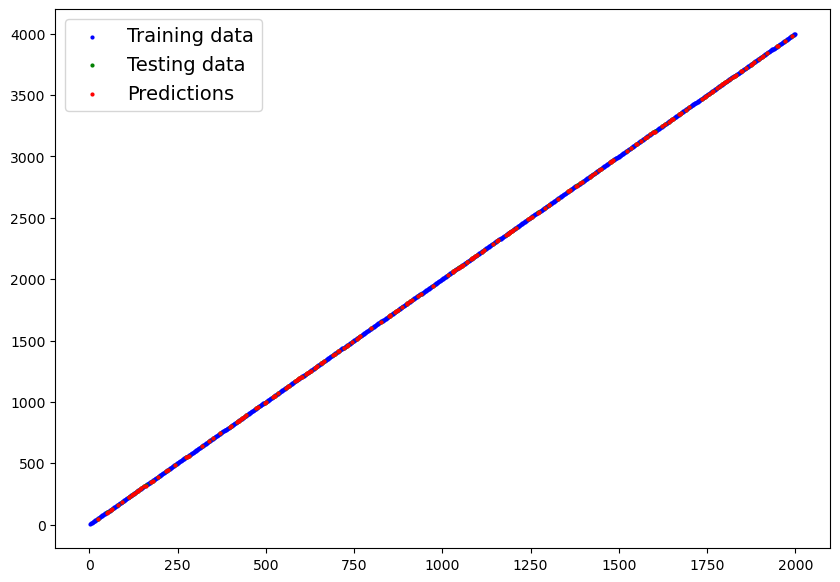

In [19]:
plot_predictions(predictions=y_preds.cpu())

In [20]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[2.0000]], device='mps:0')),
             ('linear_layer.bias', tensor([0.8313], device='mps:0'))])

In [21]:
t = model.parameters()

print(next(t))
print(next(t))
# print(next(t))

Parameter containing:
tensor([[2.0000]], device='mps:0', requires_grad=True)
Parameter containing:
tensor([0.8313], device='mps:0', requires_grad=True)
